In [1]:
import sys
from collections import defaultdict
sys.path.append("..")

from plotting_tools import *

In [2]:
def load_location_data(ww_shape_file, location_file):
    # Read wastewater shape file
    ww_data = geopandas.read_file(ww_shape_file)
    # Read mapping file into a defaultdict of lists
    mapping = defaultdict(list)
    with open(location_file) as f:
        for line in f:
            parts = line.strip().split()
            if parts:
                key = int(parts[0])
                mapping[key].extend(parts[1:])
    # Create a list of all (ww_id, location_type) pairs
    pairs = []
    for ww_id, locations in mapping.items():
        for loc in locations:
            loc_type = loc[:2]
            pairs.append((ww_id, loc_type))
    # Convert to DataFrame and count occurrences
    pairs_df = pd.DataFrame(pairs, columns=['ID_TAN', 'loc_type'])
    # Mapping loc_type codes to category names
    type_map = {
        '00': 'home_counts',
        '01': 'school_counts',
        '02': 'work_counts',
        '03': 'recreation_counts',
        '04': 'shop_counts',
        '05': 'hospital_counts',
        '06': 'icu_counts'
    }
    # Add category column
    pairs_df['category'] = pairs_df['loc_type'].map(type_map)
    # Group by ID_TAN and category and count
    counts = pairs_df.groupby(['ID_TAN', 'category']).size().unstack(fill_value=0)
    # Merge with the original GeoDataFrame
    ww_data = ww_data.merge(counts, how='left', left_on='ID_TAN', right_index=True)
    # Fill any missing count columns with 0
    for col in type_map.values():
        if col not in ww_data.columns:
            ww_data[col] = 0
    return ww_data

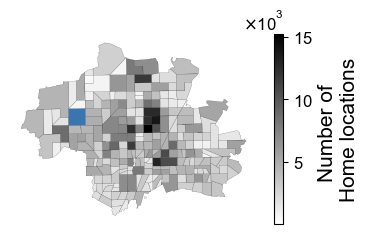

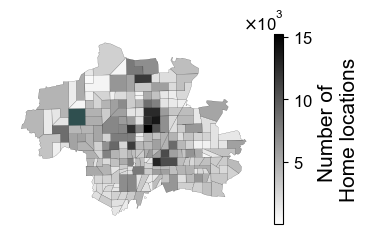

In [ ]:
ww_shape_file = 'Verschnitt_DLR_TAN_Rep.shp'
location_mapping = 'pop8/1_mapping_tan.txt'
ww_data = load_location_data(ww_shape_file, location_mapping)

figsize = (4.1, 2.6)
cmap = mcolors.LinearSegmentedColormap.from_list("custom", ["white", colors['Black']])
# Agent 1
fig, ax = plt.subplots(figsize=figsize)
ax.axis('off')
vmin = ww_data['home_counts'].min()
vmax = ww_data['home_counts'].max()
norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
ww_data.plot(column = 'home_counts', ax = ax, legend = False, legend_kwds = {'label': "Number of Home Locations"}, cmap = cmap, edgecolor = 'black', linewidth = 0.1, norm = norm)
home_cell = ww_data[ww_data.ID_TAN == 99]
home_cell.plot(ax=ax, facecolor = colors['Blue'], linewidth=0)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label(f"Number of \nHome locations")
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((3, 3))  # Scientific notation for 1e3
cbar.ax.yaxis.set_major_formatter(formatter)
plt.tight_layout()
fig.savefig(f'map_Home_locations_a1.png', dpi=dpi)
plt.show()

# Agent 2
fig, ax = plt.subplots(figsize=figsize)
ax.axis('off')
ww_data.plot(column = 'home_counts', ax = ax, legend = False, legend_kwds = {'label': "Number of Home Locations"}, cmap = cmap, edgecolor = 'black', linewidth = 0.1, norm = norm)
home_cell = ww_data[ww_data.ID_TAN == 99]
home_cell.plot(ax=ax, facecolor = colors['Dark green'], linewidth=0)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label(f"Number of \nHome locations")
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((3, 3))  # Scientific notation for 1e3
cbar.ax.yaxis.set_major_formatter(formatter)
plt.tight_layout()
fig.savefig(f'map_Home_locations_a2.png', dpi=dpi)
plt.show()